# Damped Driven Pendulum

$$\large\frac{d^2 \phi}{dt^2} +2\beta\frac{d\phi}{dt} +\omega_o^2\sin\phi=\gamma\omega_o^2\cos(\omega t)$$

First some Python library stuff

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
LARGE_FIGSIZE = (12, 8)

Now let's define the parameters for the problem

In [2]:
gamma=.01
omega=2*np.pi
omega_o=1.5*omega
beta=omega_o/4

Next we need to define the derivatives

In [3]:
def deriv(z, t):
    phi, phidot = z
    return [phidot, -2*beta*phidot-omega_o**2*np.sin(phi)+gamma*omega_o**2*np.cos(omega*t)]

Now we will create a vector of time values to solve the ODE and we will set an initial condition of (0,0).  Then we solve the ODE

In [4]:
t = np.linspace(0, 20, 2000)
zinit = [0, 0]
z = integrate.odeint(deriv, zinit, t)

Time to plot the solution for $\phi$

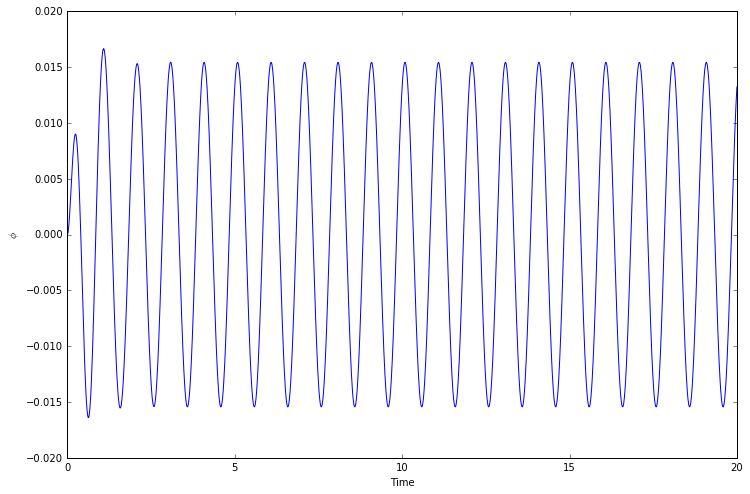

In [5]:
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,z[0:2000,0]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

Now we crank up $\gamma$

In [6]:
gamma=1.078

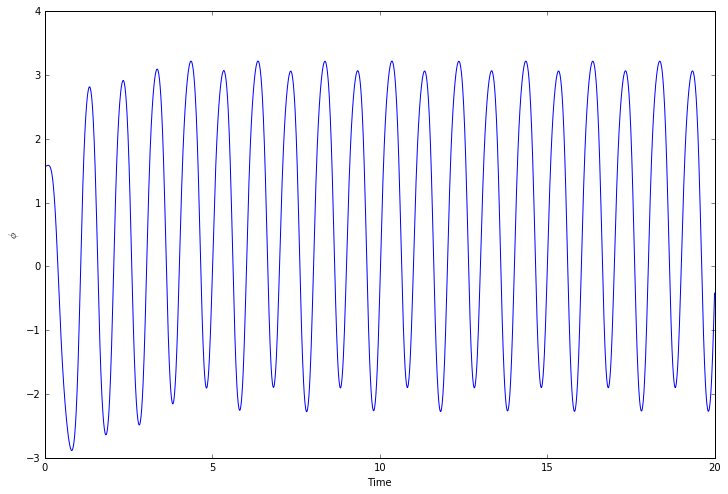

In [7]:
t = np.linspace(0, 20, 2000)
zinit = [np.pi/2, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,z[0:2000,0]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

Now we crank up $\gamma$ some more...

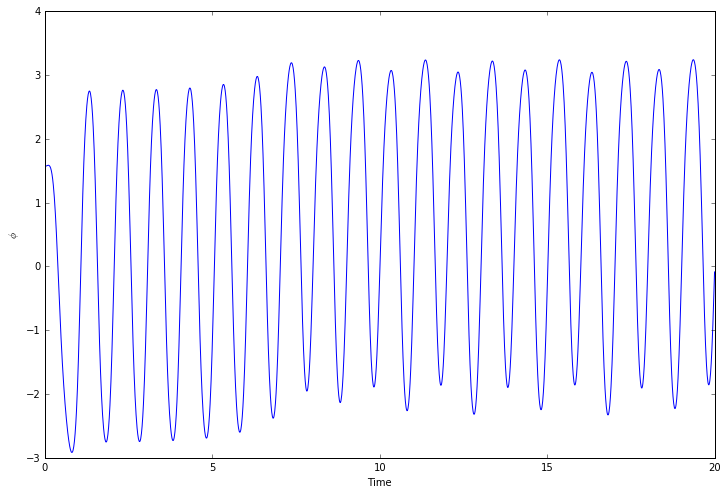

In [8]:
gamma=1.081
t = np.linspace(0, 20, 2000)
zinit = [np.pi/2, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,z[0:2000,0]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

Zooming in

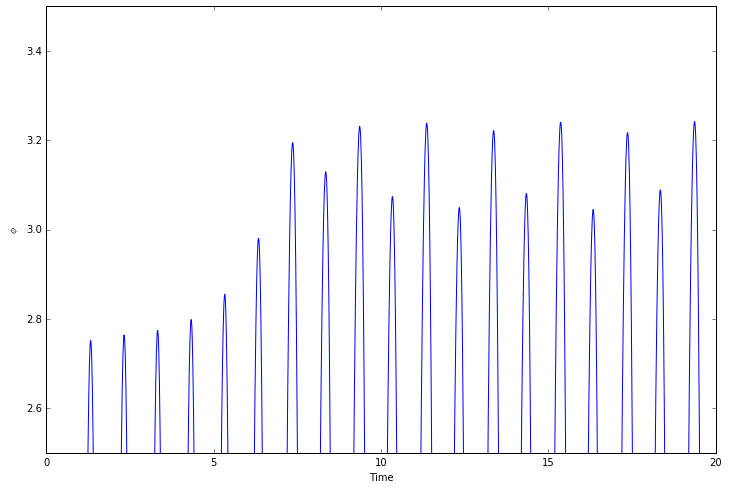

In [9]:
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,z[0:2000,0]);
plt.ylim([2.5,3.5]);
plt.xlim([0,20]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

Now we crank up $\gamma$ even more...

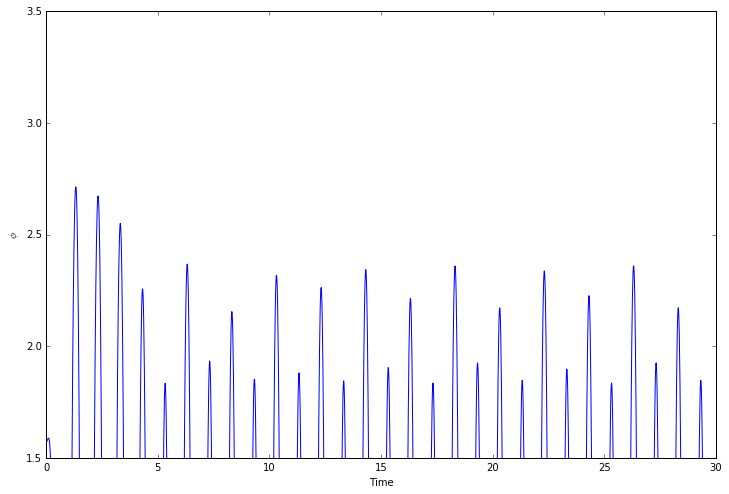

In [10]:
gamma=1.0826
t = np.linspace(0, 30, 2000)
zinit = [np.pi/2, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,z[0:2000,0]);
plt.ylim([1.5,3.5]);
plt.xlim([0,30]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

Notice that each increase in $\gamma$ for the next period doubling was smaller.  This is called a period doubling cascade.

$$\large\gamma_{n+1}-\gamma_n = \frac{1}{\delta_f} (\gamma_n-\gamma_{n-1})$$

And notice for this geometric series, that $\gamma$ goes to a fixed value as n goes to $\infty$.

That fixed value is 1.0829 and the name given to the $\delta_f$ is the Fiegenbaum Number.

So what happens to the pendulum when you go over 1.0829?

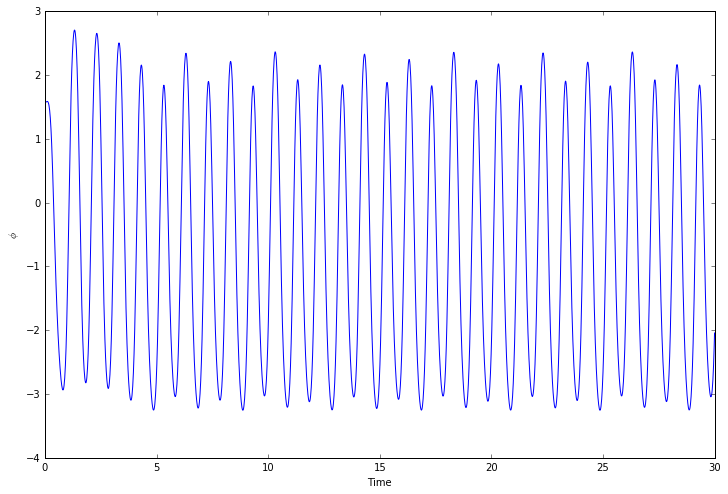

In [11]:
gamma=1.0829
t = np.linspace(0, 30, 2000)
zinit = [np.pi/2, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,z[0:2000,0]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

And if we look longer in time, there is no sign of a repeating pattern.

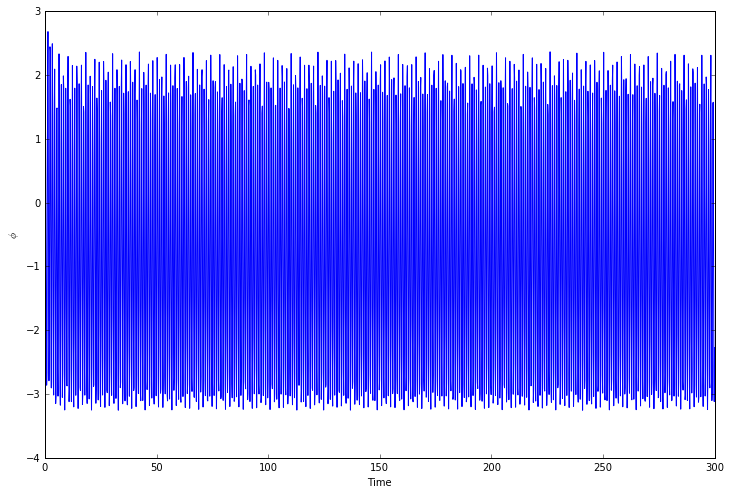

In [12]:
gamma=1.0829
t = np.linspace(0, 300, 2000)
zinit = [np.pi/2, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,z[0:2000,0]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

Next let's look at the impact of changing the initial conditions.
First let's do it for the system prior to going chaotic.

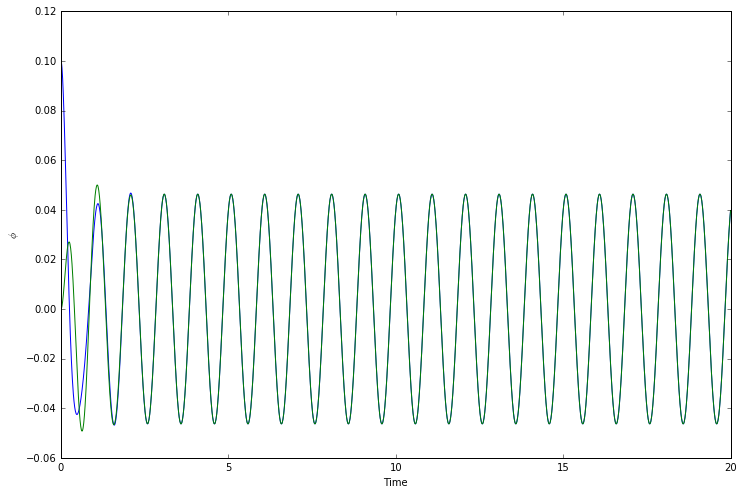

In [13]:
gamma=.03
t = np.linspace(0, 20, 2000)
zinit = [0, 0]
z = integrate.odeint(deriv, zinit, t)
zinit = [0+.1, 0]
zz = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,zz[0:2000,0]);
ax.plot(t,z[0:2000,0]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

We can plot the difference between the two solutions through time

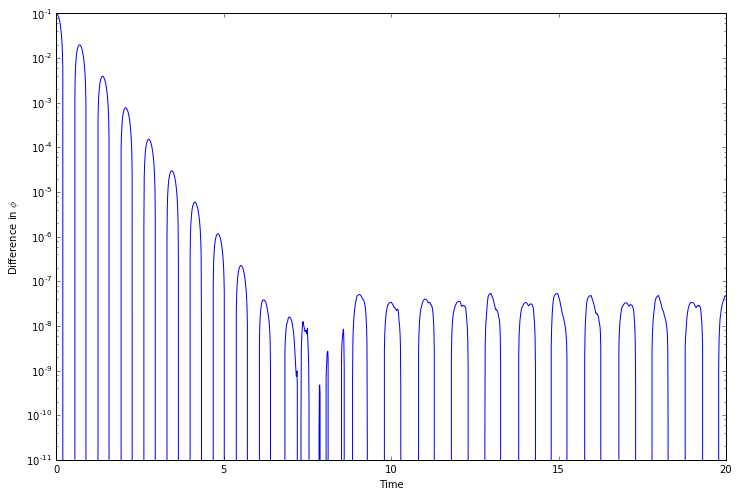

In [14]:
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,zz[0:2000,0]-z[0:2000,0]);
plt.yscale('log')
plt.ylabel('Difference in $\phi$');
plt.xlabel('Time');

Now let's do the same thing, but when the system is chaotic (the larger value for the drive strength)

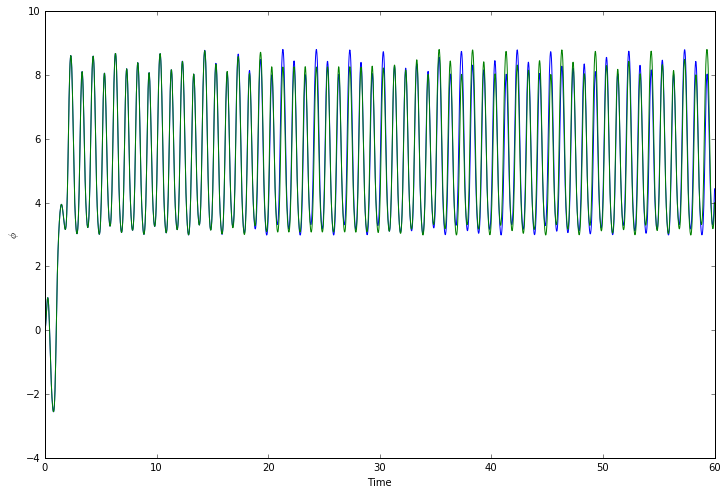

In [15]:
gamma=1.09
t = np.linspace(0, 60, 2000)
zinit = [0, 0]
z = integrate.odeint(deriv, zinit, t)
zinit = [0+.000001, 0]
zz = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,zz[0:2000,0]);
ax.plot(t,z[0:2000,0]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

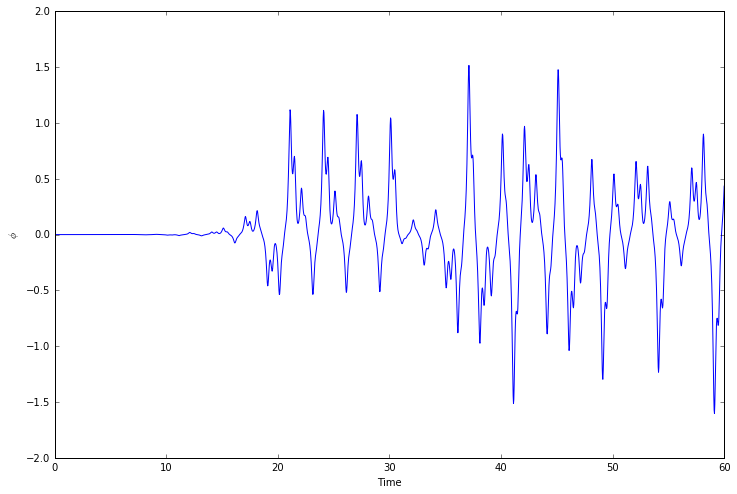

In [16]:
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,zz[0:2000,0]-z[0:2000,0]);
#plt.yscale('log')
#plt.ylim([10**-20,10**1]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

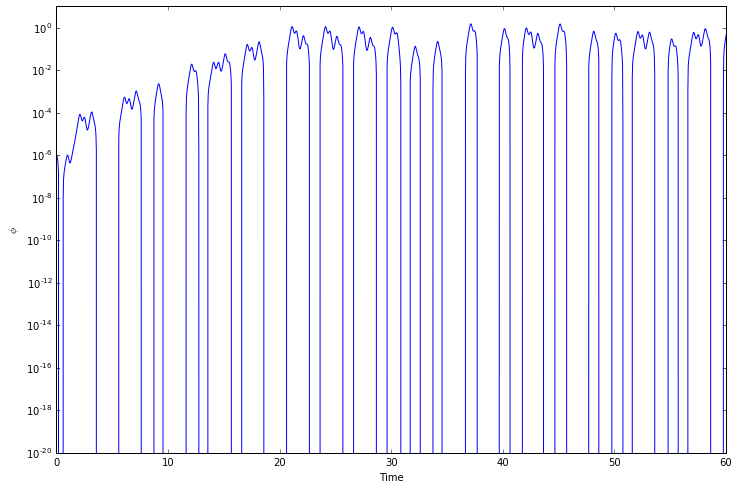

In [17]:
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,zz[0:2000,0]-z[0:2000,0]);
plt.yscale('log')
plt.ylim([10**-20,10**1]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

We can show that in the linear case we expect different initial conditions to converge to the same solution:

$$\Delta\phi=\phi_2-\phi_1$$

$$\phi_1(t)=A\cos(\omega t)+C_1e^{r_1t}+C_2e^{r_2t}$$

$$\phi_2(t)=A\cos(\omega t)+D_1e^{r_1t}+D_2e^{r_2t}$$

$$\Delta\phi=B_1e^{(-\beta+\sqrt{\beta^2-\omega_o^2})t}+B_2e^{(-\beta+\sqrt{\beta^2-\omega_o^2})t}$$

$$\Delta\phi=De^{-\beta t}\cos{(\omega_1 t - \delta)}$$

$$ln\mid{\Delta\phi (t)}\mid=ln D - \beta t - ln\mid \cos{\omega_1 t - \delta}\mid$$

We can show that in the linear case we expect different initial conditions to converge to the same solution:

$$\Large\Delta\phi=\phi_2-\phi_1$$

$$\Large\phi_1(t)=A\cos(\omega t)+C_1e^{r_1t}+C_2e^{r_2t}$$

$$\Large\phi_2(t)=A\cos(\omega t)+D_1e^{r_1t}+D_2e^{r_2t}$$

$$\Large\Delta\phi=B_1e^{(-\beta+\sqrt{\beta^2-\omega_o^2})t}+B_2e^{(-\beta+\sqrt{\beta^2-\omega_o^2})t}$$

$$\Large\Delta\phi=De^{-\beta t}\cos{(\omega_1 t - \delta)}$$

$$\Large ln\mid{\Delta\phi (t)}\mid=ln D - \beta t - ln\mid \cos{\omega_1 t - \delta}\mid$$


But this is all just fancy physics stuff right?  Who cares about pendulums?  We live in NC!  Tell me about something I care about like Hurricanes.

<img src="storm_ensemble.png">

For the sensitivity to initial conditions, the difference between two solutions explodes expoentially:
$$\Large\mid\Delta\phi(t)\mid \approx ke^\lambda t$$    
$\lambda$ is called the Lyapunov exponent

So is it all just chaos above the critical $\gamma$ ?

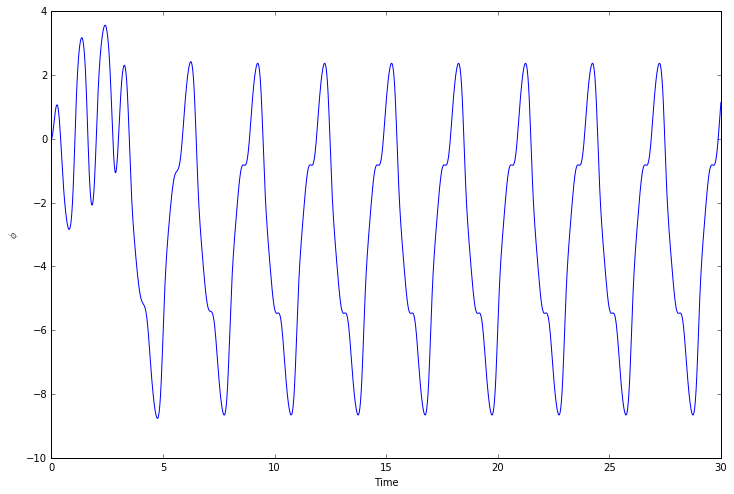

In [18]:
gamma=1.13
t = np.linspace(0, 30, 2000)
zinit = [0, 0]
z = integrate.odeint(deriv, zinit, t)
zinit = [0+.000001, 0]
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,z[0:2000,0]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

Now crank $\gamma$ up some more

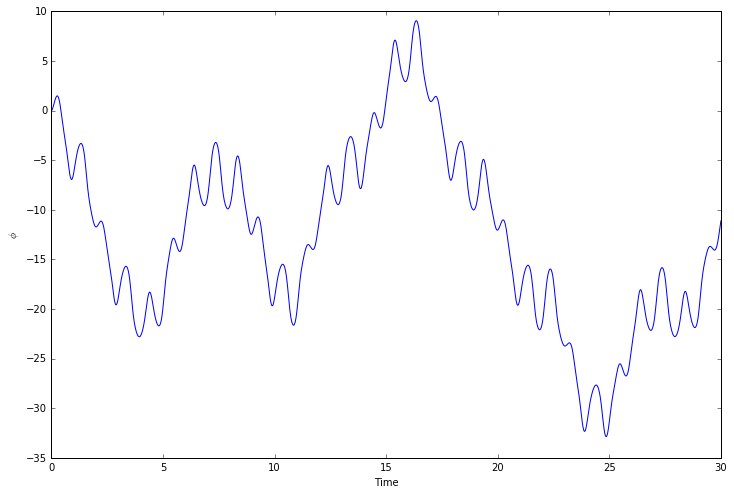

In [21]:
gamma=1.503
t = np.linspace(0, 30, 2000)
zinit = [0, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,z[0:2000,0]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

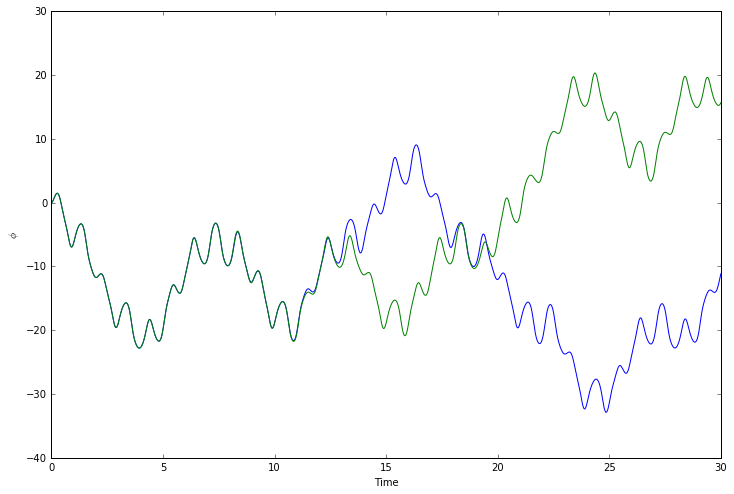

In [22]:
gamma=1.503
t = np.linspace(0, 30, 2000)
zinit = [0+.0001, 0]
zz = integrate.odeint(deriv, zinit, t)
zinit = [0+.000001, 0]
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(t,z[0:2000,0]);
ax.plot(t,zz[0:2000,0]);
plt.ylabel('$\phi$');
plt.xlabel('Time');

Next we need to think about how to see all of this varying behavior as we change the drive strength.

In [23]:
store_vals = np.zeros([100,70])
dum_gam = np.linspace(1.06, 1.087, 70)
for i in range(70):
    gamma = dum_gam[i]
    t = np.linspace(0, 500, 500000)
    zinit = [-np.pi/2, 0]
    z = integrate.odeint(deriv, zinit, t)
    store_vals[:,i] = z[400000:500000:1000,0]

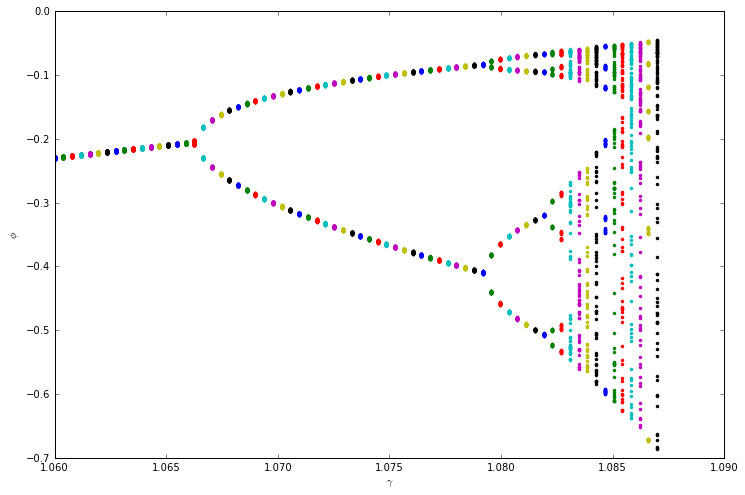

In [24]:
import numpy.matlib
dum = np.matlib.repmat(dum_gam,100,1)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(dum,store_vals,'.');
ax.set_ylabel('$\phi$');
ax.set_xlabel('$\gamma$');

How about we plot the velocity and go to much larger values of gamma - what do you think it will look like?

In [25]:
store_vals = np.zeros([100,200])
dum_gam = np.linspace(1.03, 1.53, 200)
for i in range(200):
    gamma = dum_gam[i]
    t = np.linspace(0, 500, 500000)
    zinit = [-np.pi/2, 0]
    z = integrate.odeint(deriv, zinit, t)
    store_vals[:,i] = z[400000:500000:1000,1]

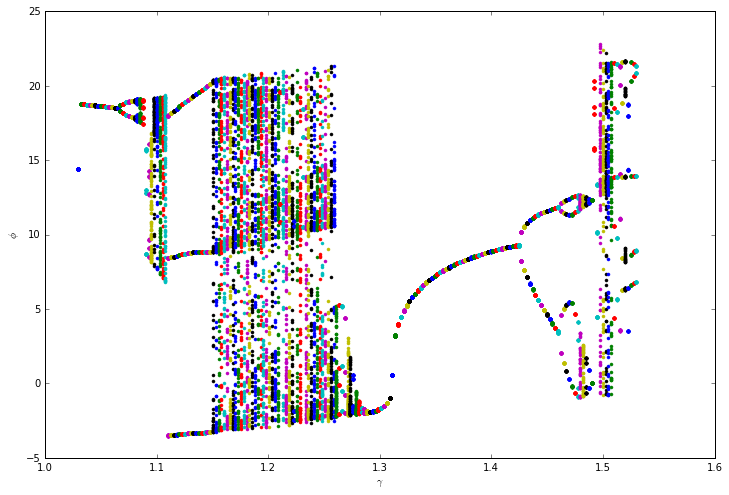

In [26]:
dum = np.matlib.repmat(dum_gam,100,1)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(dum,store_vals,'.');
ax.set_ylabel('$\phi$');
ax.set_xlabel('$\gamma$');

Another way to look at the systems behavior as we have seen, is the phase space plot:

What are the phase space axes of the DDP?

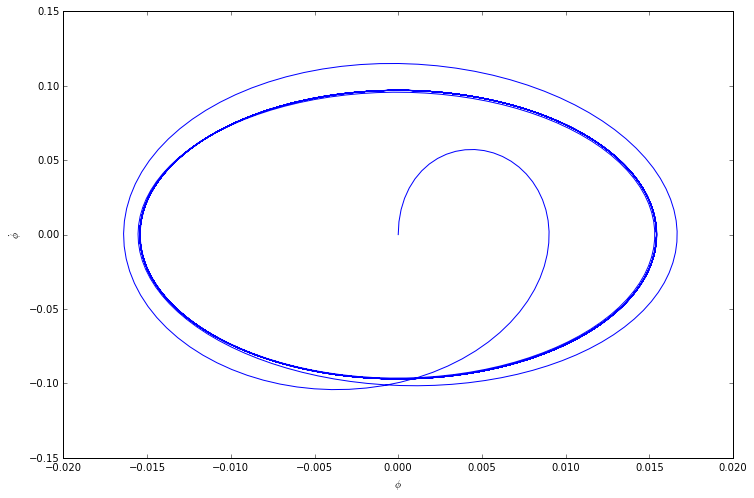

In [28]:
gamma=.01
t = np.linspace(0, 20, 2000)
zinit = [0, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(z[0:2000,0],z[0:2000,1]);
plt.xlabel("$\phi$");
plt.ylabel("$\dot{\phi}$");

Let's just look at the attractor

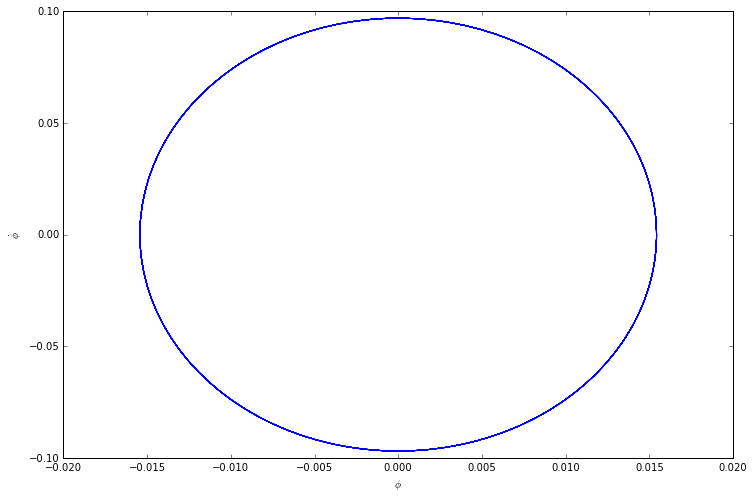

In [29]:
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(z[1000:2000,0],z[1000:2000,1]);
plt.xlabel("$\phi$");
plt.ylabel("$\dot{\phi}$");

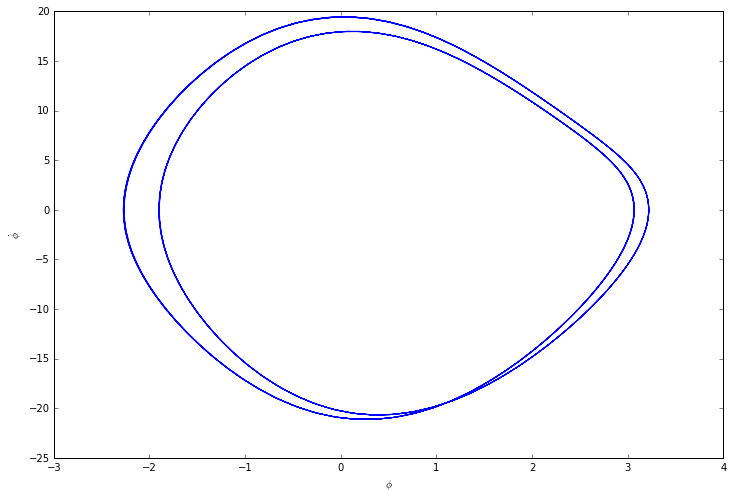

In [30]:
gamma=1.078
t = np.linspace(0, 20, 2000)
zinit = [np.pi/2, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(z[1000:2000,0],z[1000:2000,1]);
plt.xlabel("$\phi$");
plt.ylabel("$\dot{\phi}$");

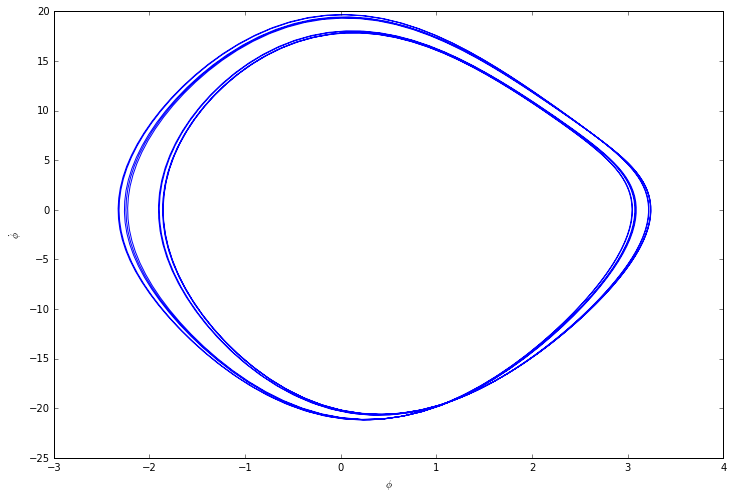

In [31]:
gamma=1.081
t = np.linspace(0, 20, 2000)
zinit = [np.pi/2, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(z[1000:2000,0],z[1000:2000,1]);
plt.xlabel("$\phi$");
plt.ylabel("$\dot{\phi}$");

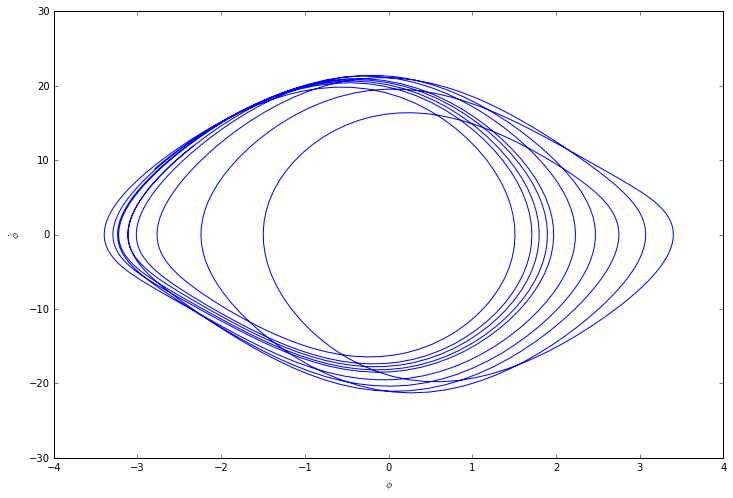

In [32]:
gamma=1.105
t = np.linspace(0, 20, 2000)
zinit = [np.pi/2, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(z[1000:2000,0],z[1000:2000,1]);
plt.xlabel("$\phi$");
plt.ylabel("$\dot{\phi}$");

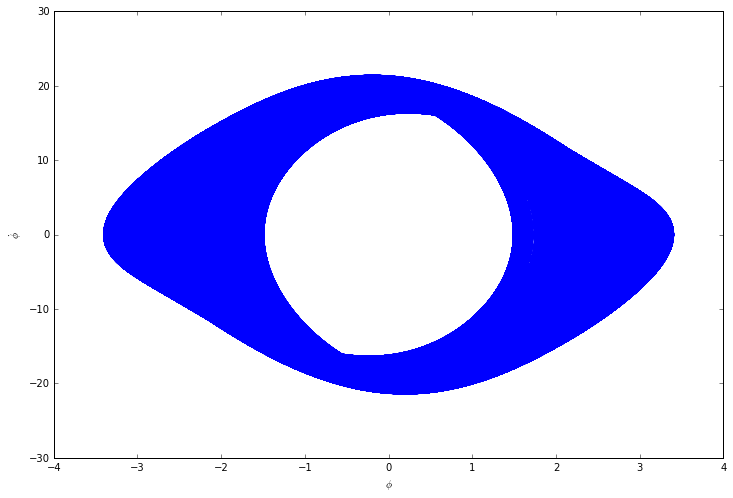

In [33]:
gamma=1.105
t = np.linspace(0, 2000, 200000)
zinit = [np.pi/2, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(z[1000:200000,0],z[1000:200000,1]);
plt.xlabel("$\phi$");
plt.ylabel("$\dot{\phi}$");

There is a nice way to clean this up.  Take sections/slices.  Said another way, iterate at fixed intervals and see where the system is

<img src="poincare_idea.png" width="520">

What do you think this looks like for the chaotic pendulum?

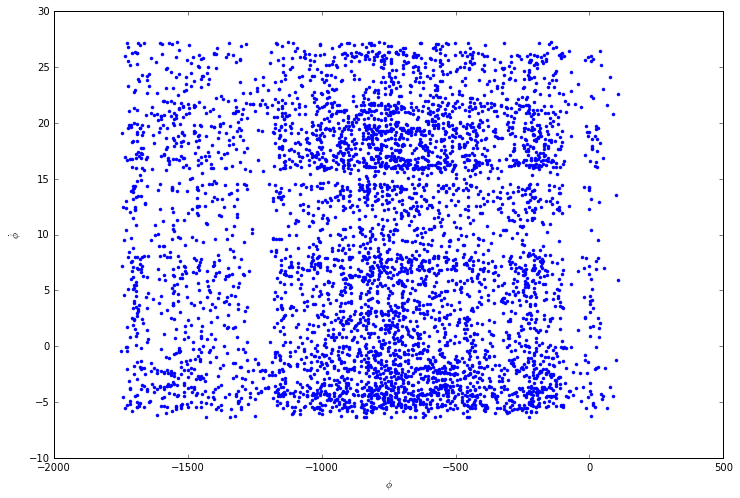

In [34]:
gamma=1.5
beta=omega_o/8
t = np.linspace(0, 5000, 5000000)
zinit = [-np.pi/2, 0]
z = integrate.odeint(deriv, zinit, t)
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(z[10000:5000000:1000,0],z[10000:5000000:1000,1],'.');
plt.xlabel("$\phi$");
plt.ylabel("$\dot{\phi}$");

<img src="poincare.png" width="520">

Let's zoom in...

<img src="poincare_zoom1.png" width="520">

And let's zoom in somre more...

<img src="poincare_zoom2.png" width="520">

# Other Systems

Ball Bouncing on a plate

<img src="ball_plate2.png" width="520">

<img src="ball_plate1.png" width="520">

<img src="bifurcation_ballplate.png" width="520">

Lorenz System

$$\frac{dX}{dt}=pr(-X+Y)$$
$$\frac{dY}{dt}=rX-Y-XZ$$
$$\frac{dZ}{dt}=XY-bZ$$

In [35]:
p=0.5
sigma=10
beta=8/3
def solvr_long(Y, t):
    return [sigma*(Y[1]-Y[0]), Y[0]*(p-Y[2])-Y[1], Y[0]*Y[1]-beta*Y[2]]   
a_t_long = np.arange(0, 1000, 0.01)
asol_long = integrate.odeint(solvr_long, [5.5, 5.5, 5.5], a_t_long)

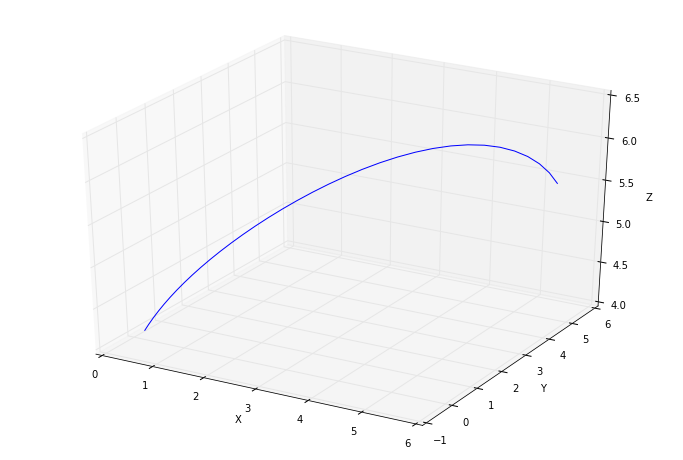

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=LARGE_FIGSIZE)
ax = fig.add_subplot(111, projection='3d')
ax.plot(asol_long[0:35:,0],asol_long[0:35,1],asol_long[0:35,2],'b');
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_zlabel('Z');

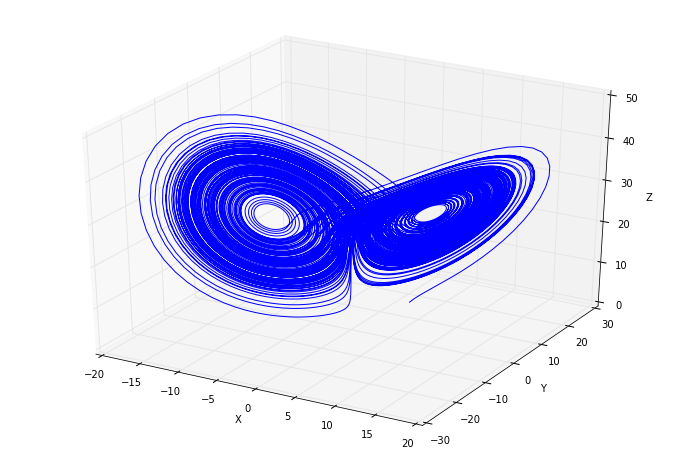

In [39]:
p=28
sigma=10
beta=8/3
a_t_long = np.arange(0, 200, 0.01)
asol_long = integrate.odeint(solvr_long, [5.5, 5.5, 5.5], a_t_long)
fig = plt.figure(figsize=LARGE_FIGSIZE)
ax = fig.add_subplot(111, projection='3d')
ax.plot(asol_long[:,0],asol_long[:,1],asol_long[:,2],'b')
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_zlabel('Z');

Look at just X

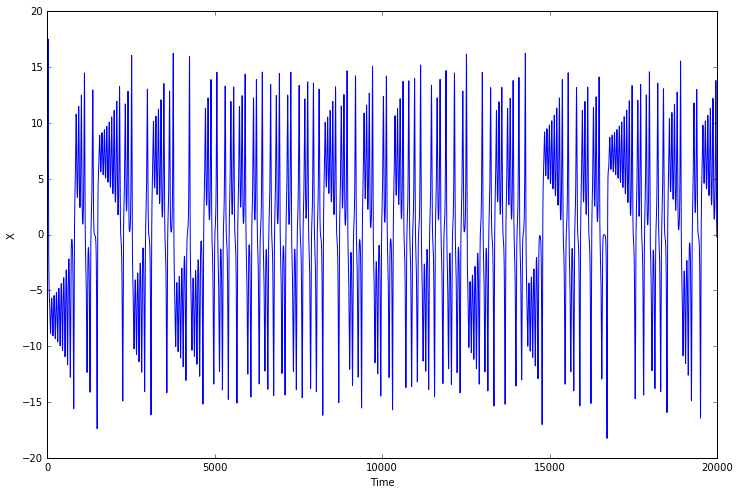

In [41]:
fig, ax = plt.subplots(figsize=LARGE_FIGSIZE)
ax.plot(asol_long[:,0])
ax.set_xlabel('Time');
ax.set_ylabel('X');